In [2]:
import numpy as np
import pandas as pd
import os
from os import path
from wordcloud import WordCloud
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [6]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv("adult.data", header=None, names = heading, na_values="?", skipinitialspace = True)
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

<=50K    24720
>50K      7841
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

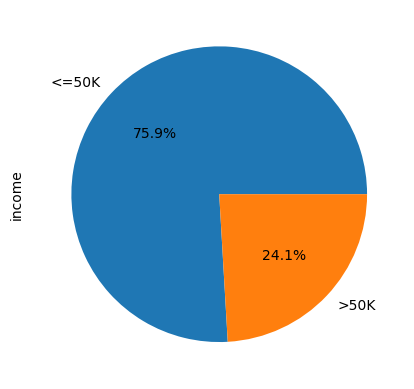

In [8]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

In [16]:
def draw_distplot(column, title = ""):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


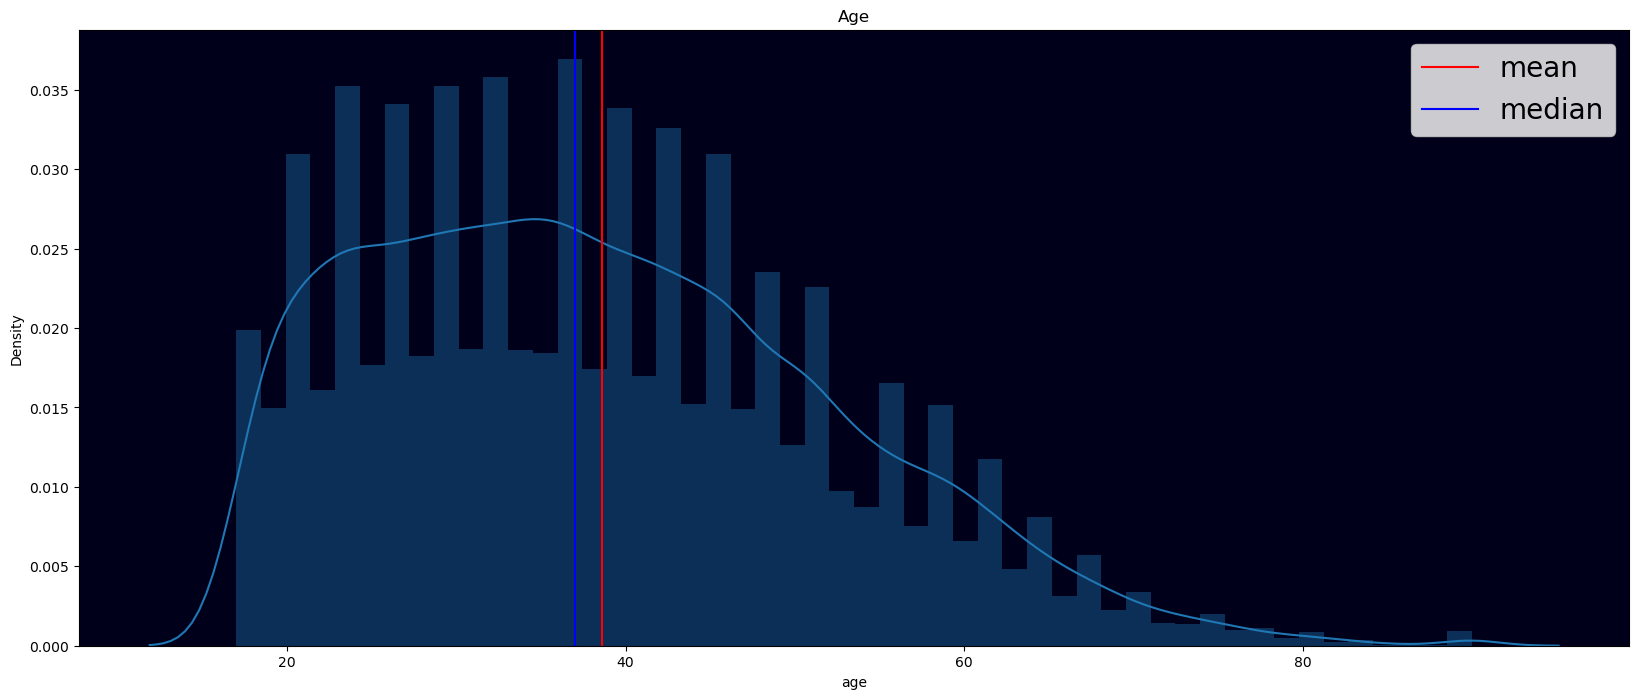

In [15]:
draw_distplot(column=df['age'], title="Age")

In [17]:
print('precise median age for >50K income : ',df[df['income']=='>50K']['age'].median(), 'yrs')

precise median age for >50K income :  44.0 yrs


In [18]:
print('precise median age for <=50K income : ',df[df['income']=='<=50K']['age'].median(), 'yrs')

precise median age for <=50K income :  34.0 yrs


In [19]:
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 30})
    plt.show()

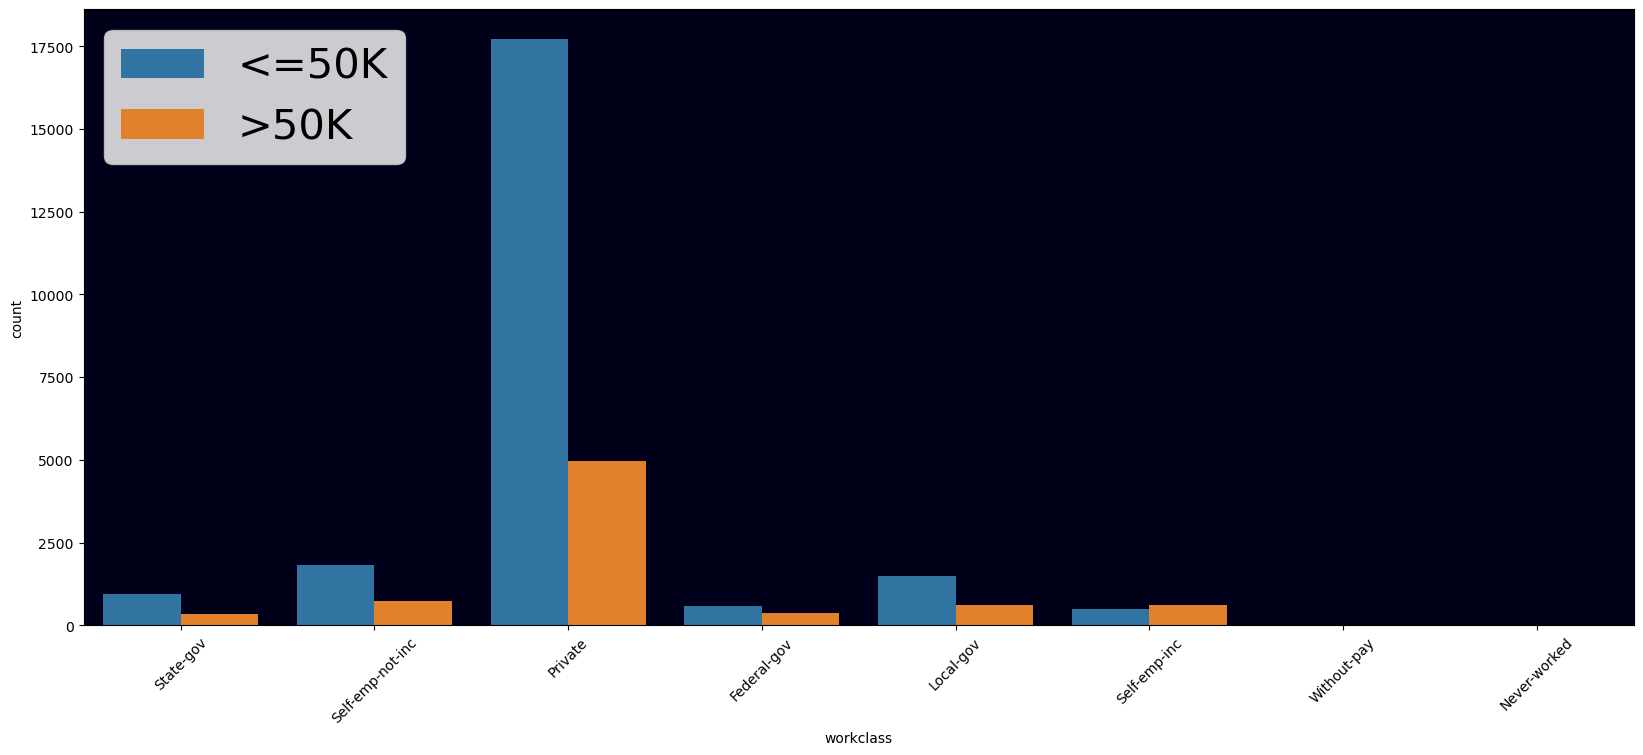

In [20]:
draw_countplot(countplot_x='workclass', countplot_hue='income', countplot_data=df)

In [21]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [22]:
df['workclass'].replace(['Never-worked', 'Without-pay', 'Federal-gov'],'Other', inplace = True)
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Other                 981
Name: workclass, dtype: int64

In [23]:
pd.isnull(df["workclass"]).value_counts()

False    30725
True      1836
Name: workclass, dtype: int64

In [24]:
df['workclass'].fillna('Other', inplace = True)
df['workclass'].value_counts()

Private             22696
Other                2817
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Name: workclass, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


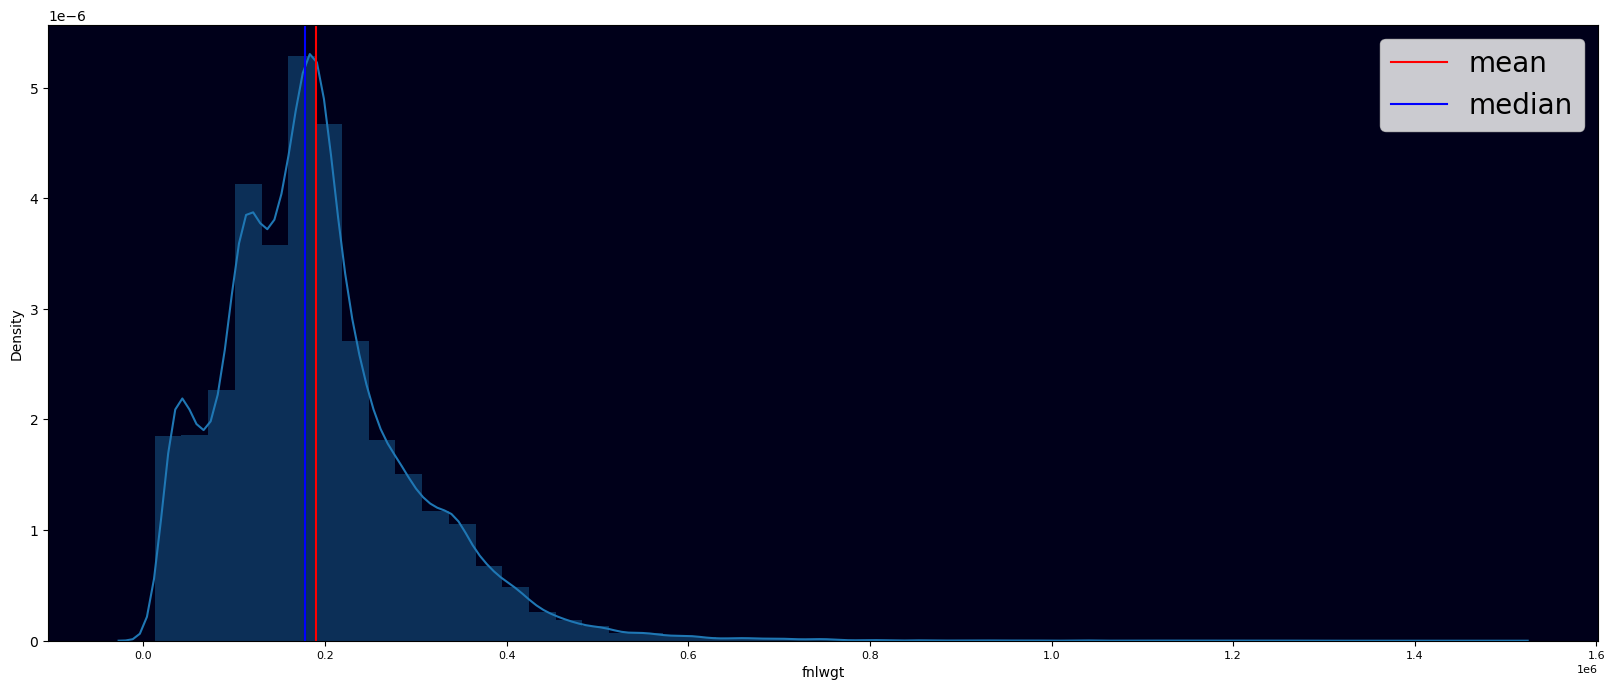

In [25]:
draw_distplot(column=df['fnlwgt'])

In [26]:
df = df.drop(['fnlwgt'], axis=1)

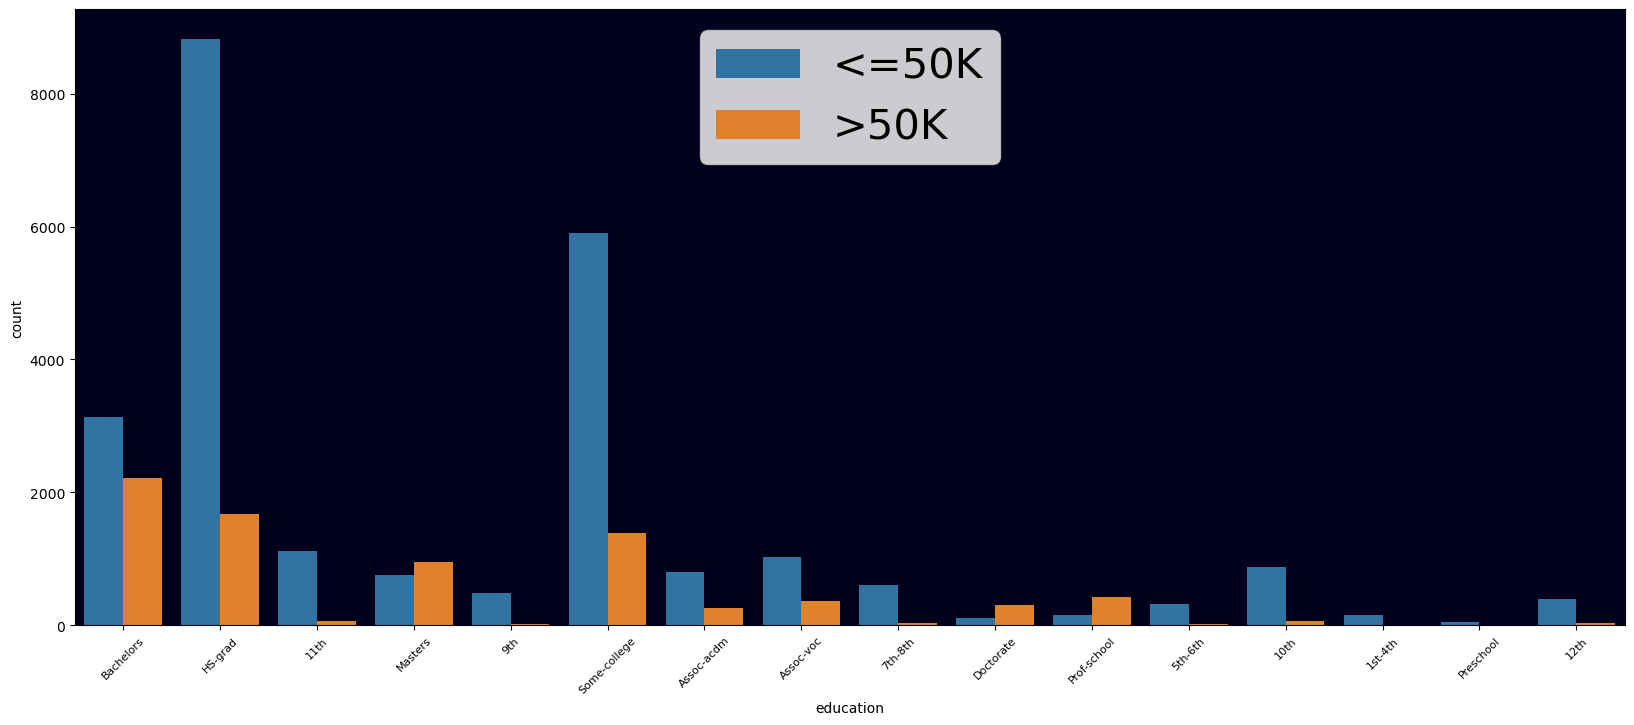

In [27]:
draw_countplot(countplot_x='education', countplot_hue='income', countplot_data=df)

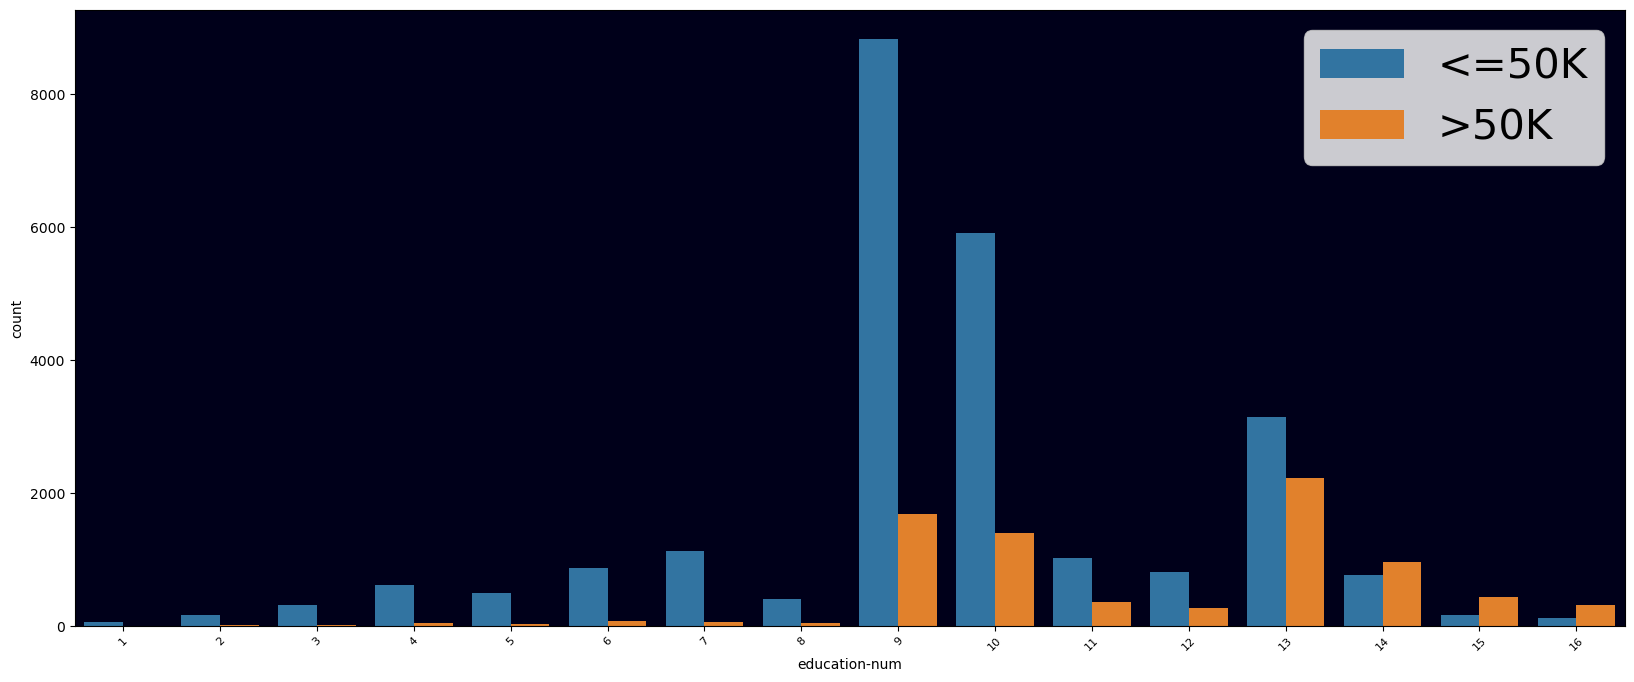

In [28]:
draw_countplot(countplot_x='education-num', countplot_hue='income', countplot_data=df)

In [29]:
education_var = df['education'].unique()
for edu_var in education_var:
    print("For {}, the Education Number is {}"
          .format(edu_var, df[df['education'] == edu_var]['education-num'].unique()))

For Bachelors, the Education Number is [13]
For HS-grad, the Education Number is [9]
For 11th, the Education Number is [7]
For Masters, the Education Number is [14]
For 9th, the Education Number is [5]
For Some-college, the Education Number is [10]
For Assoc-acdm, the Education Number is [12]
For Assoc-voc, the Education Number is [11]
For 7th-8th, the Education Number is [4]
For Doctorate, the Education Number is [16]
For Prof-school, the Education Number is [15]
For 5th-6th, the Education Number is [3]
For 10th, the Education Number is [6]
For 1st-4th, the Education Number is [2]
For Preschool, the Education Number is [1]
For 12th, the Education Number is [8]


In [30]:
df.drop(['education'], axis = 1, inplace = True)

In [31]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [32]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

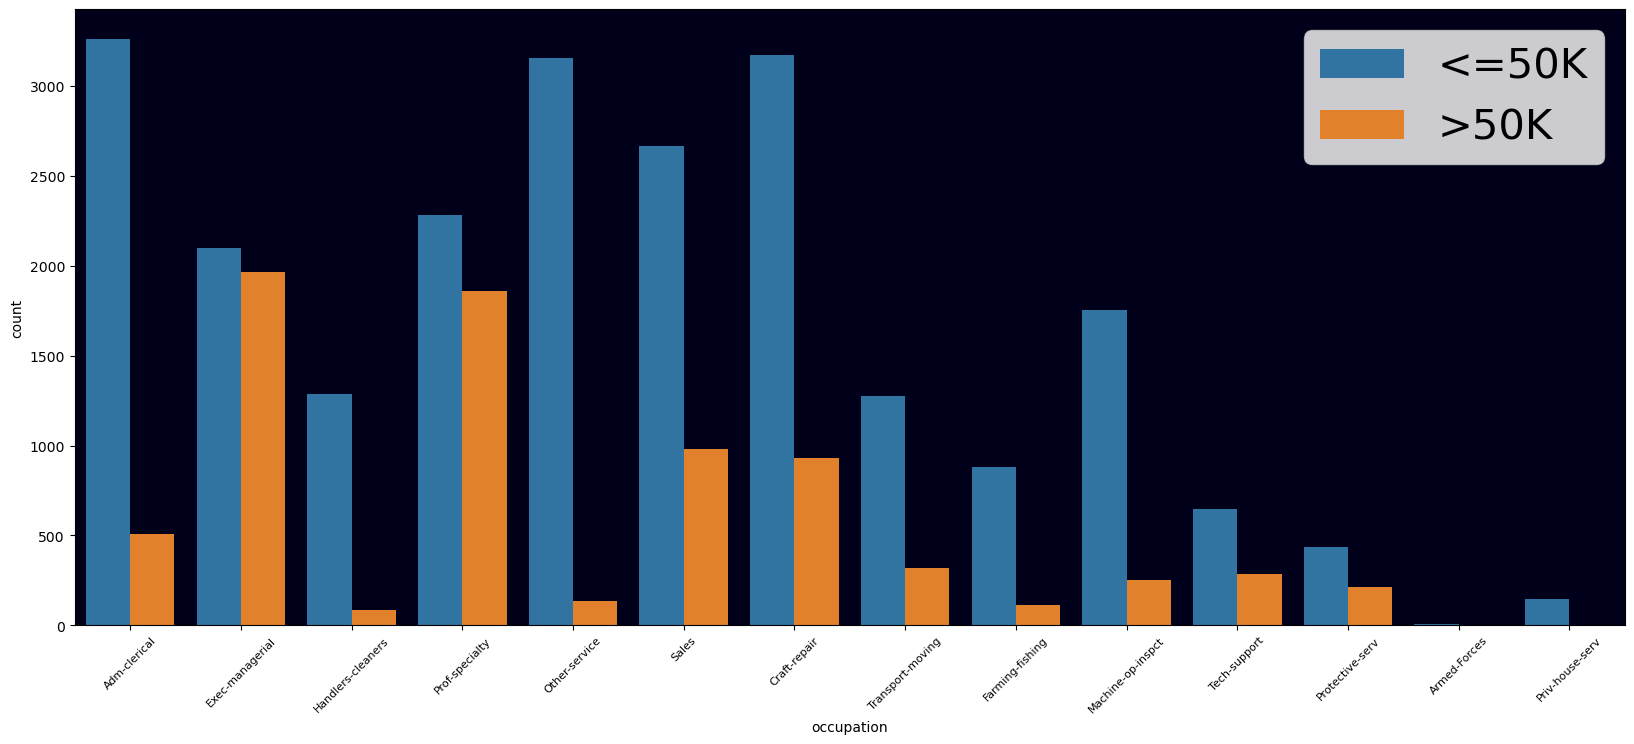

In [33]:
draw_countplot(countplot_x='occupation', countplot_hue='income', countplot_data=df)

In [34]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [35]:
# creating bool series True for NaN values
bool_series = pd.isnull(df["occupation"])
# filtering data
print("displaying data only with team = NaN")
df[bool_series]

displaying data only with team = NaN


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,Other,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Other,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,Other,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Other,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Other,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Other,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Other,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Other,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Other,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [36]:
bool_series.value_counts()

False    30718
True      1843
Name: occupation, dtype: int64

In [38]:
df['occupation'].fillna('Other', inplace = True)
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Other                1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [39]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [40]:
pd.isnull(df["relationship"]).value_counts()

False    32561
Name: relationship, dtype: int64

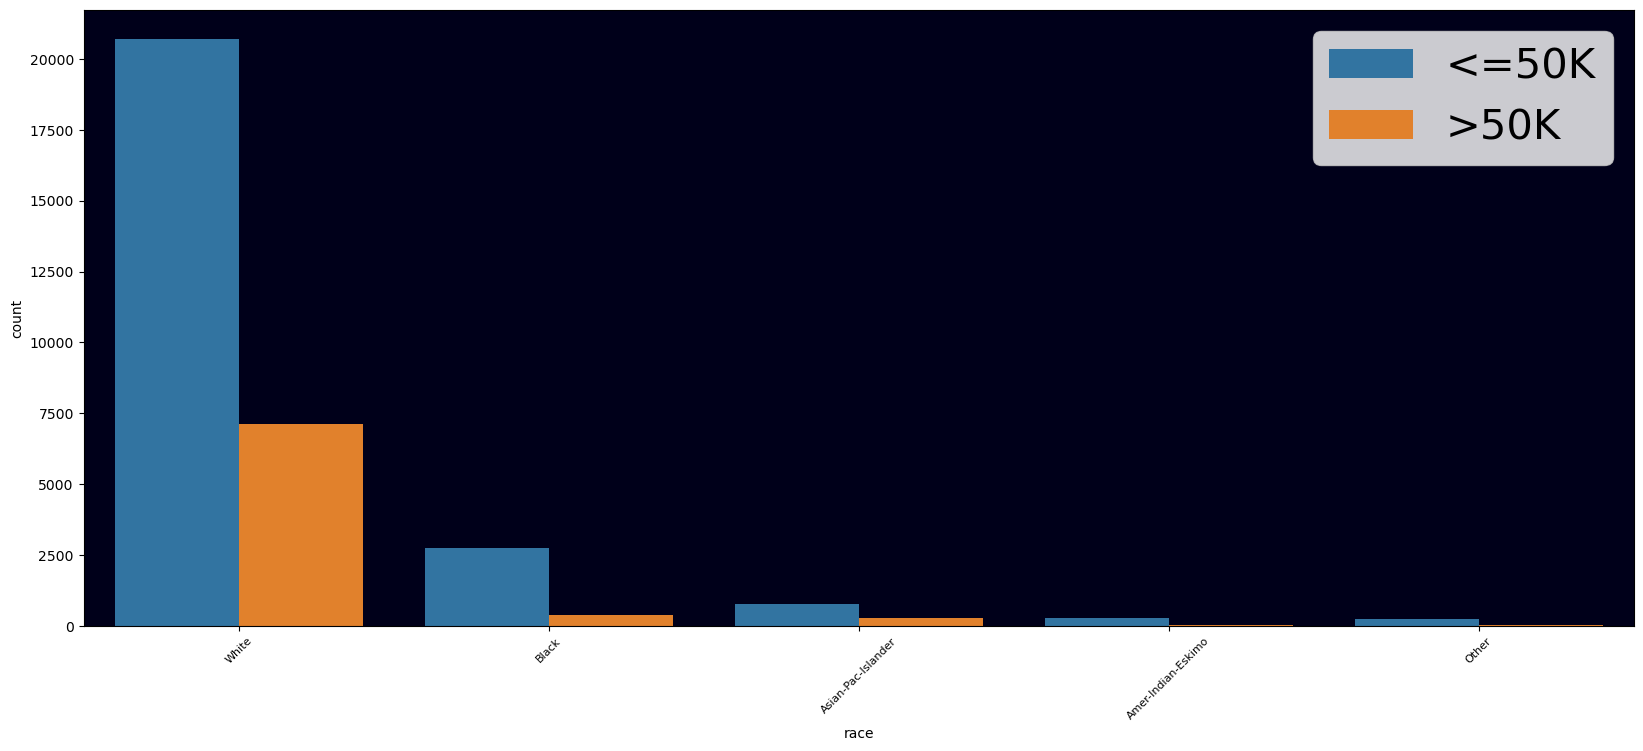

In [41]:
draw_countplot(countplot_x='race', countplot_hue='income', countplot_data=df)

In [42]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)
df['race'].value_counts()


White    27816
Black     3124
Other     1621
Name: race, dtype: int64

sex     income
Female  <=50K      9592
        >50K       1179
Male    <=50K     15128
        >50K       6662
Name: income, dtype: int64
------------------------------------------------


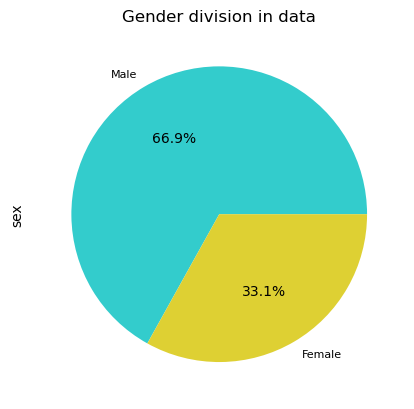

<Figure size 1000x600 with 0 Axes>

------------------------------------------------


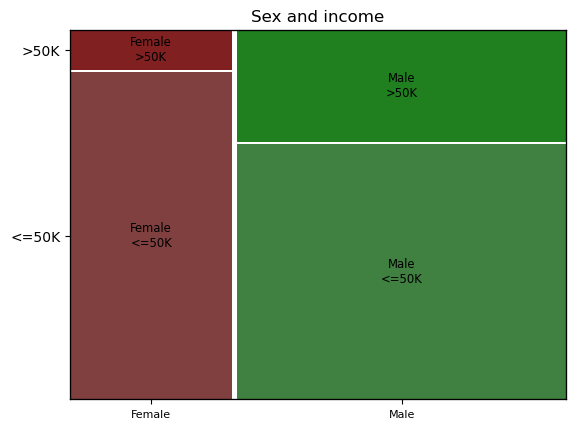

In [43]:
sex_income = pd.DataFrame({'sex': df['sex'], 'income': df['income']})
data = sex_income.income.groupby([sex_income.sex,  sex_income.income]).size()
plt.title('Gender division in data')
print(data)
print('------------------------------------------------')
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])
plt.figure(figsize=(10,6))
plt.show()
print('------------------------------------------------')
mosaic(data, gap=0.01, title = "Sex and income")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


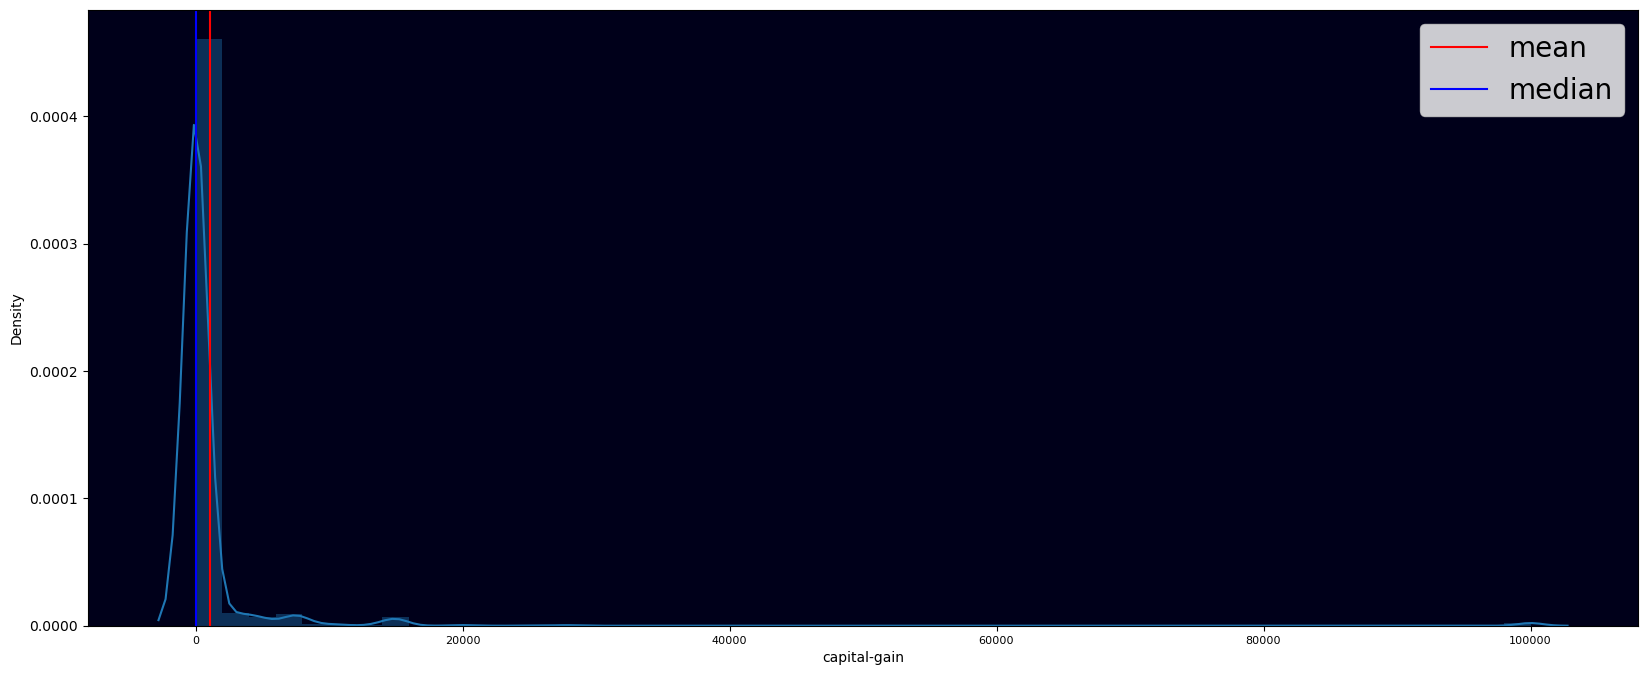

In [44]:
draw_distplot(column=df['capital-gain'])

In [45]:
print(df['capital-gain'].value_counts())

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


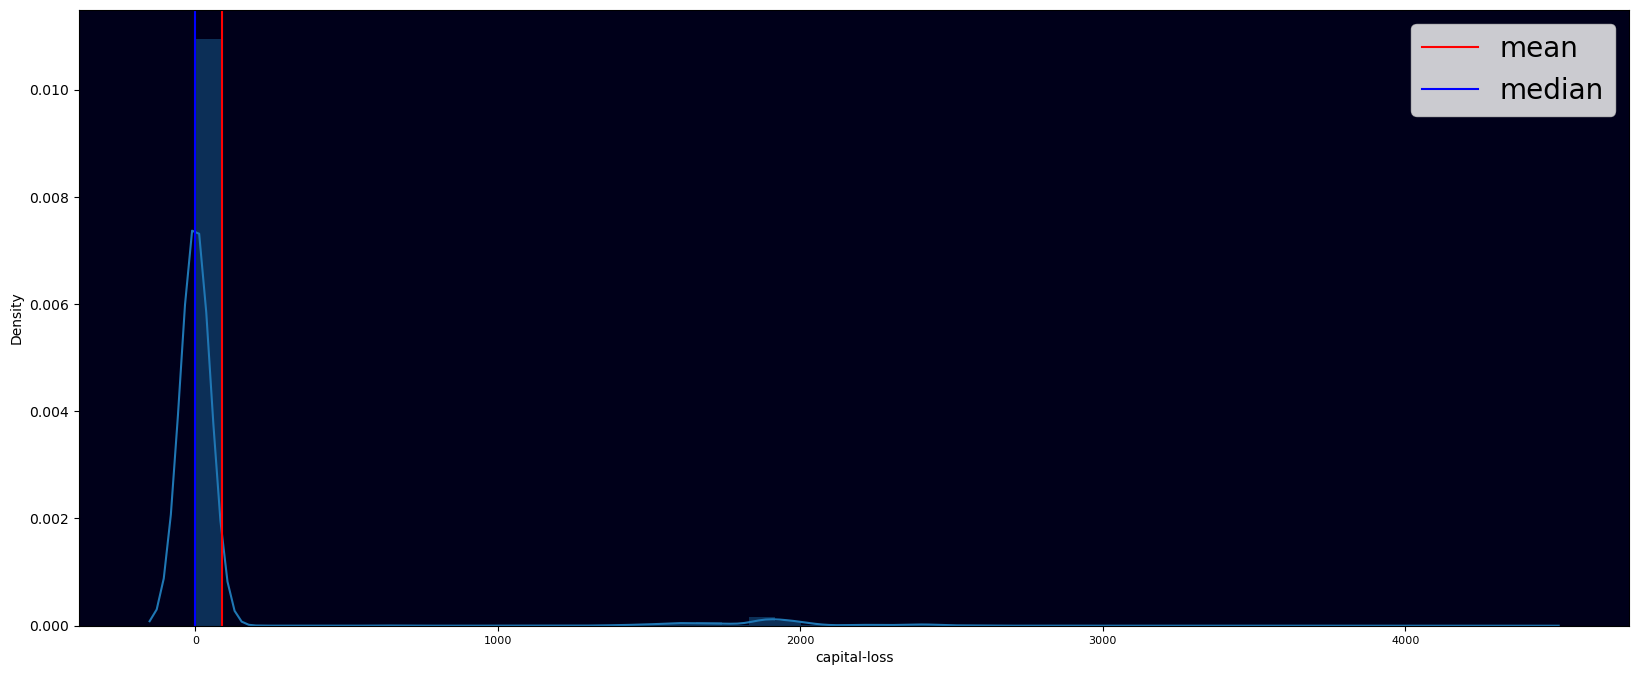

In [46]:
draw_distplot(column=df['capital-loss'])

In [47]:
print(df['capital-loss'].value_counts())

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


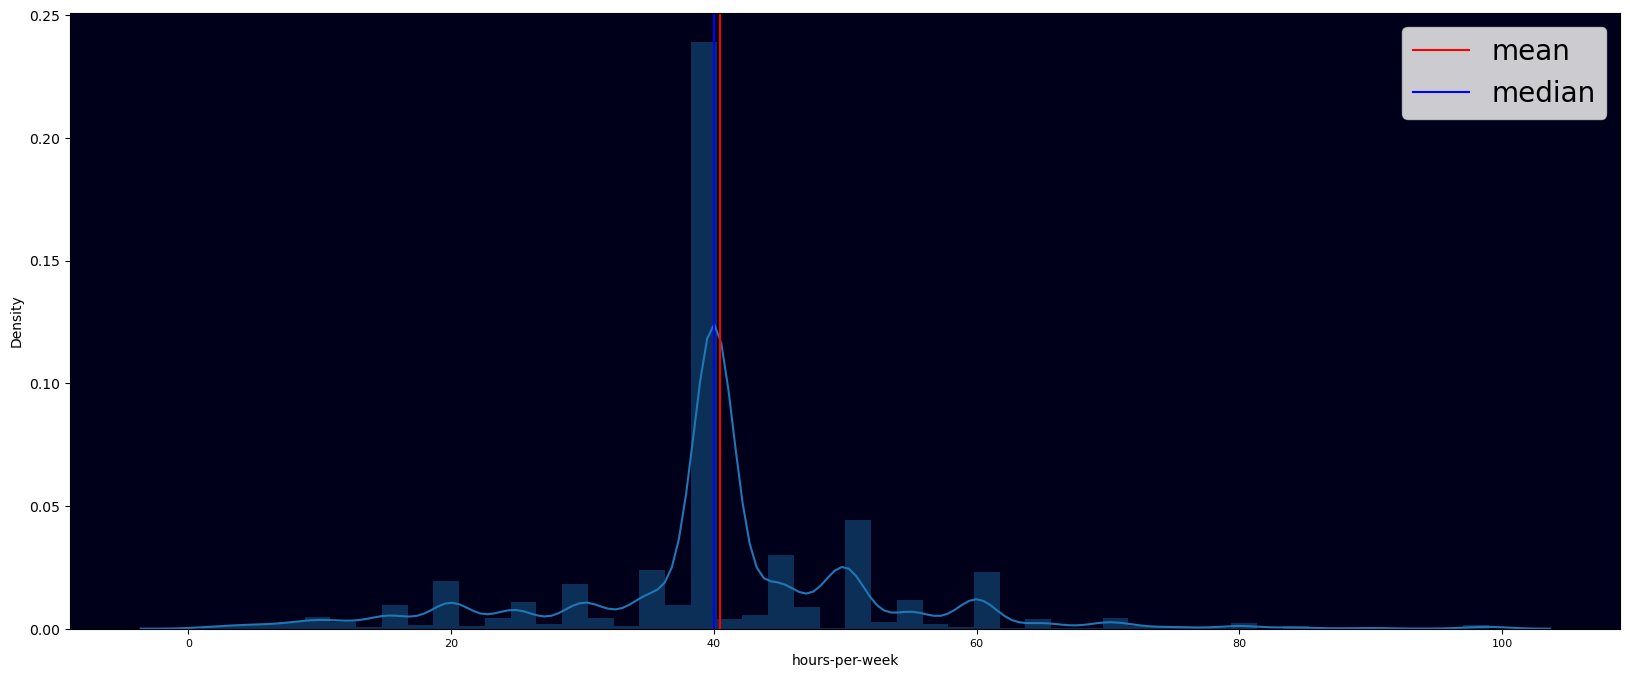

In [48]:
draw_distplot(column=df['hours-per-week'])

In [49]:
print(df['native-country'].value_counts())

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Text(0.5, 1.0, 'Total adults from each Country')

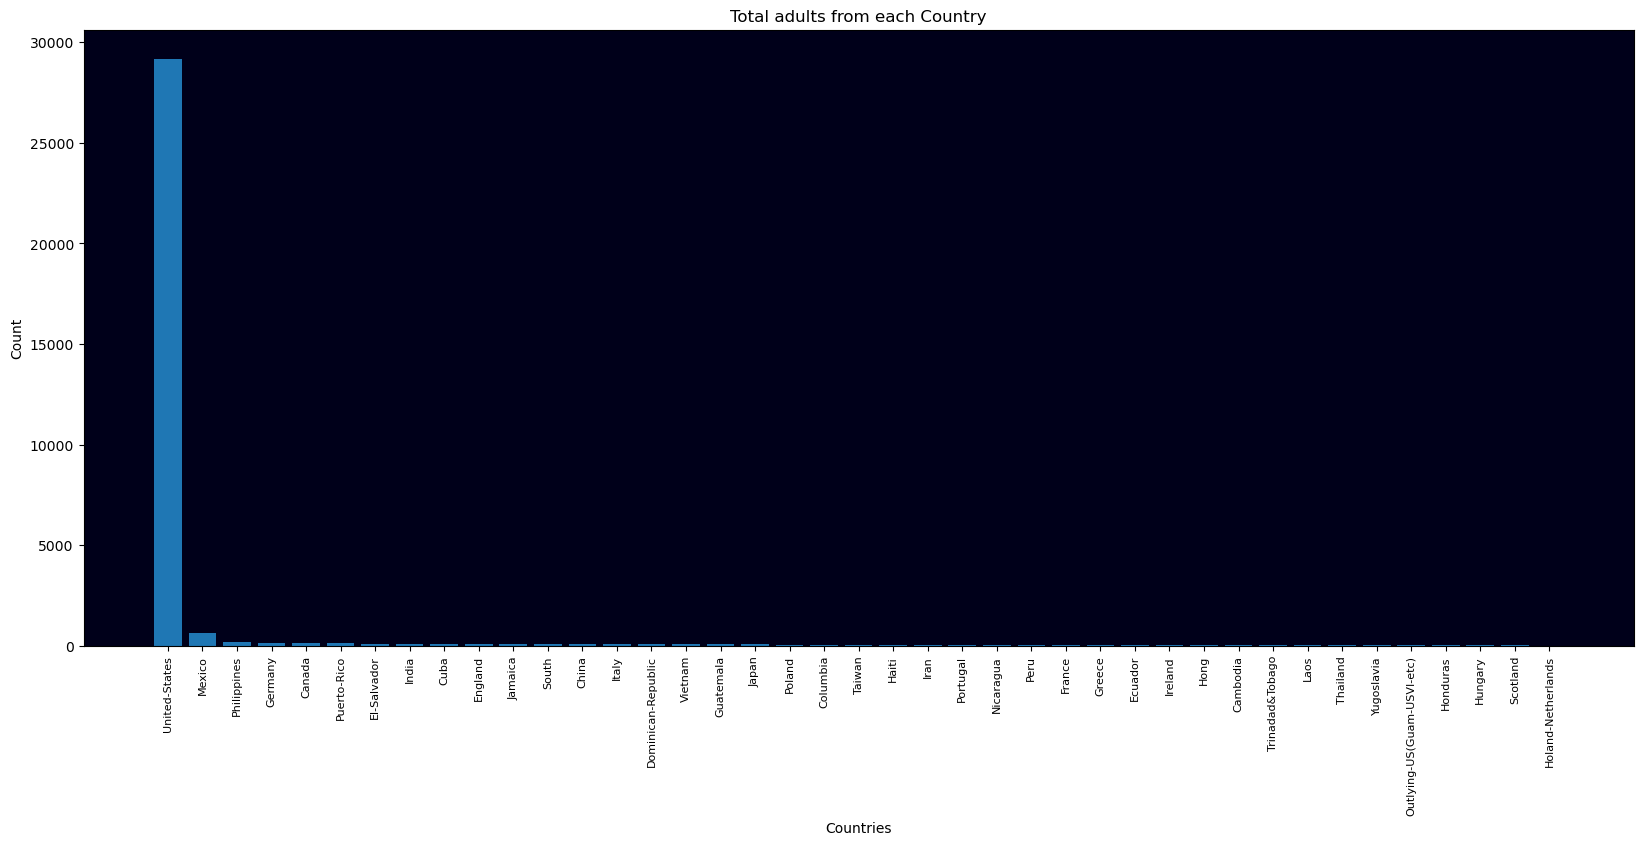

In [50]:
country_count = df['native-country'].value_counts()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

<AxesSubplot:xlabel='count', ylabel='native-country'>

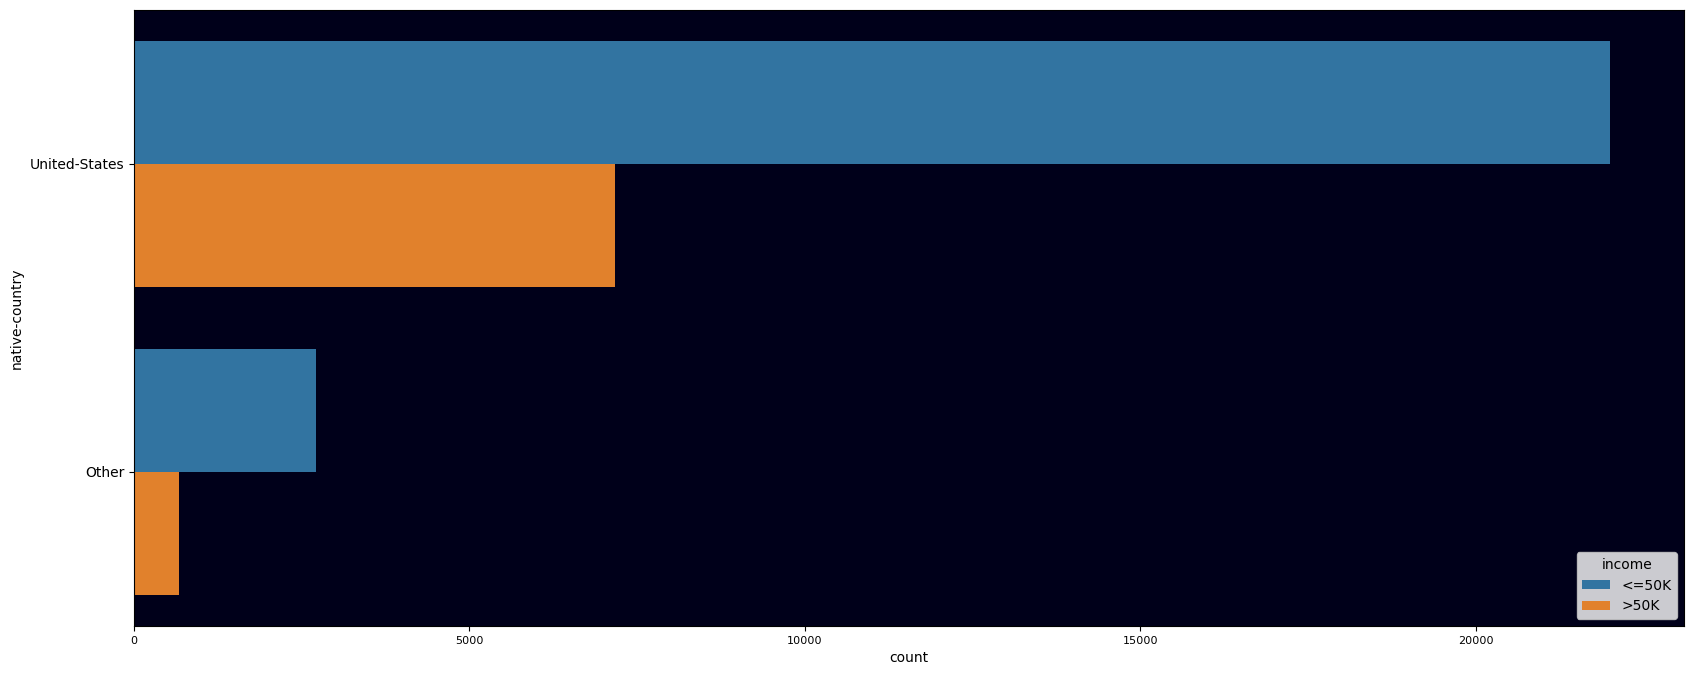

In [51]:
df = df.drop(df[df['native-country'] == '?'].index)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)
df['native-country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'native-country', hue = 'income', data = df)

In [52]:
df['target'] = df['income']
df['target'] = np.where(df['income'].isin(['>50K']), 1, 0)

In [53]:
missing_values_income = df['income'].isnull().sum()
print("Missing values in INCOME column ", missing_values_income)

Missing values in INCOME column  0


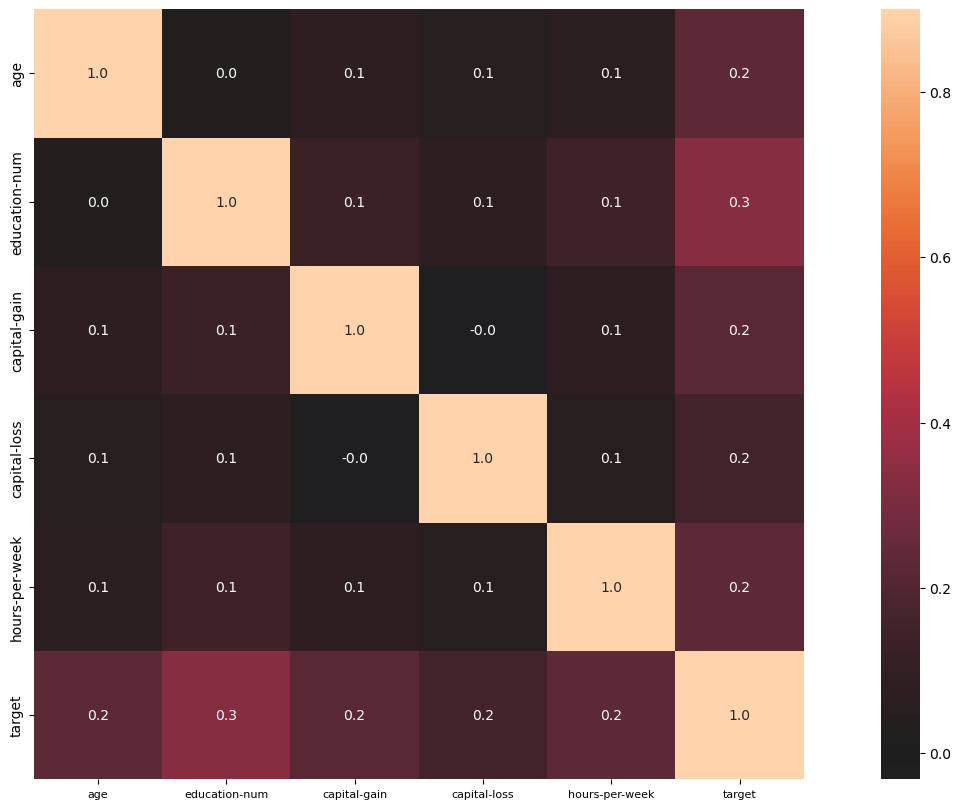

In [54]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)
plt.show()

In [55]:
df = df.drop(columns=['income'])

In [56]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0


In [57]:
df.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [58]:
target = 'target'
num_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

In [59]:
encoder = OneHotEncoder()
encoder_cols = encoder.fit_transform(df[cat_features])
# Add one-hot encoded columns to numerical features and target column
df = pd.concat([pd.concat([df[num_features], encoder_cols], axis=1), df[target]], axis=1)
df.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States,target
0,39,2174,0,40,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,50,0,0,13,13,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
2,38,0,0,40,9,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,53,0,0,40,7,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,28,0,0,40,13,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [62]:
features = df.columns.tolist()
features.remove(target)
X = df[features]

y = df[target]

In [63]:
def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        
        #split dataset into train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, 
                                                            stratify=y)

        # Fit the classifier to the data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show() 

In [64]:
def GridSearch(param, estimator, X=X, y=y):
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, grid_rf_predictions))

In [65]:
def CVmodel(nFolds = 5, randomState=2020, features=features, lin_reg = False, lin_reg_without_fi = False,
            cutoff=0.5, debug= False, model = SVC(), df = df, pipeline = False):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    
    # predictions for individual folds
    predictions = []

    # the index in the original file
    indices = []
    true=[]
    
    if lin_reg:
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            # preds = model.predict_proba(df.iloc[test][features])[:,1]
            preds, y_test = model.predict(df.iloc[test][features], round(cutoff,1))
            
            # information about predictions for this fold
            predictions.append(preds.tolist().copy())
            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
            
            true = (df.iloc[test][target]==1)
            if(lin_reg_without_fi == False):
                feature_importance = model.coef_
        if(lin_reg_without_fi):
            return predictions, indices, true
            
        return predictions, indices, feature_importance, true
    if(pipeline):
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            preds = model.predict_proba(df.iloc[test][features])[:,1]

            # information about predictions for this fold
            predictions.append(preds.tolist().copy())

            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
        
        return predictions, indices, true
        
    for train, test in kf.split(df.index.values):
        if debug:
            print(model)
        model.fit(df.iloc[train][features], df.iloc[train][target])

        # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
        preds = model.predict_proba(df.iloc[test][features])[:,1]

        # information about predictions for this fold
        predictions.append(preds.tolist().copy())

        # indexed in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())

        true.append(df.iloc[test][target]==1)

        feature_importance = model.feature_importances_
        
    return predictions, indices, feature_importance, true

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


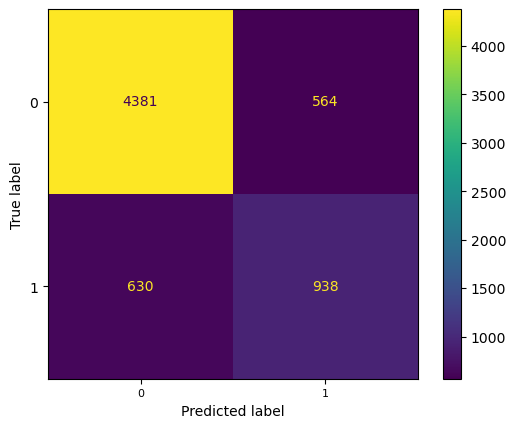

In [66]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier()

ConfusionMatrix(classifier=tree, confusionMatrix=False)


In [67]:
tree = DecisionTreeClassifier()
predictions, indices, feature_importance, true = CVmodel(model=tree)

tree = {
    "name":"Decision Tree",
    "predictions" : predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true":true
}

In [79]:
# open the file for binary writing using "with"
with open("modelresult/decision_tree.p", "wb") as fp:
    pickle.dump(tree, fp)

In [80]:
class LinearRegression(SklearnLinearRegression):

    def predict(self, X_test, cutoff):
        y_pred = super().predict(X_test) 
        
        # initialise a matrix full with zeros
        y_pred_classes = np.zeros_like(y_pred)
        # add a 1 if the cutoff was breached
        y_pred_classes[y_pred > cutoff] = 1       
        
        return y_pred_classes, y_test

In [81]:
def ConfusionMatrixOrHeatMap(y_true, y_pred, confusionMatrix = True, 
                                       HeatmapConfusionMatrix = True):
    #confusion matrix
    c = confusion_matrix(y_true, y_pred)
    
    if(confusionMatrix):
        return c
    if(HeatmapConfusionMatrix):
        #drawing Plot Confusion Matrix
        sns.heatmap(c, annot=True, fmt="d")
        plt.show() 

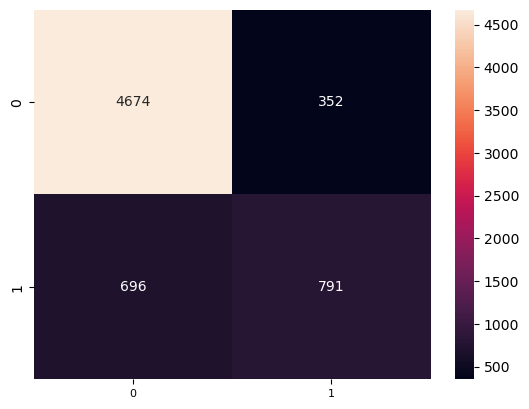

In [82]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#create object of LinearRegression class
lr = LinearRegression()
# Fit the classifier to the data
lr.fit(X=X_train, y=y_train)
#classifing prediction by threshold 0.7
y_pred_classes, y_test_lr = lr.predict(X_test, 0.5)

ConfusionMatrixOrHeatMap(y_test_lr, y_pred_classes, confusionMatrix = False)


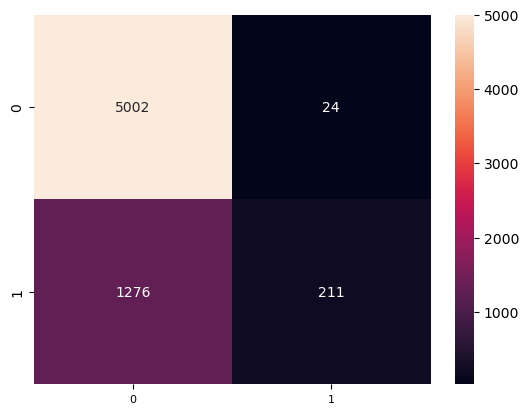

In [83]:
#create object of LinearRegression class
lr = LinearRegression()
# Fit the classifier to the data
lr.fit(X=X_train, y=y_train)
#classifing prediction by threshold 0.7
y_pred_classes, y_test_lr = lr.predict(X_test, 0.7)

ConfusionMatrixOrHeatMap(y_test_lr, y_pred_classes, confusionMatrix = False)

In [85]:
def plotROCs(results, saving = False):
    # Determining the size of the drawing
    fig, ax = plt.subplots(figsize=(10,9))
    ax.set_facecolor((0,0,0.1))
    
        
    for true, pred, label in results:
        
        # Calculation of the points needed to draw the ROC curve
        # the roc_curve function concludes three data series, fpr, 
        #tpr, and cutoff levels
        fpr, tpr, thresholds = roc_curve(true, pred)
        
        # We calculate the area under the curve
        rocScore = roc_auc_score(true, pred)
        rocScore = round(rocScore, 3)
        
        # curve thickness
        lw = 2

        # We draw the ROC curve
        ax.plot(fpr, tpr, lw=lw, label=f'{label}: {rocScore}')
  
    # We draw a 45 degree curve as a reference point
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
    # We add light margins to the range so that the curve 
    #does not coincide with the axes
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic - {rocScore}')
    ax.legend(loc="lower right")
    if saving:
        plt.savefig('images/ROC.png')
    plt.show()

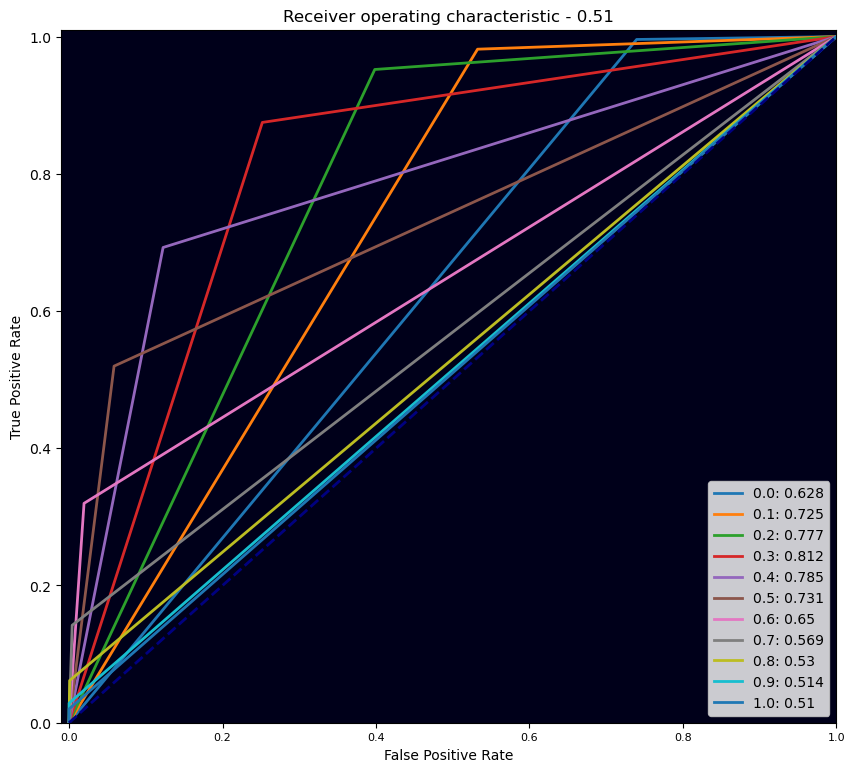

In [86]:
lr = LinearRegression()
res2plot = []
true = (df[target]==1)
for cutoff in np.arange(0, 1.1, 0.1):
    predictions, indices, tru = CVmodel(model=lr, lin_reg=True, cutoff=cutoff, lin_reg_without_fi=True)
    pred = pd.Series(sum(predictions, []), 
                     index=sum(indices, [])).sort_index()
    res2plot.append((true, pred, "%.1f" % round(cutoff,1)))
plotROCs(res2plot)

In [87]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
lr = LinearRegression()
predictions, indices, feature_importance, true = CVmodel(model=lr, lin_reg=True, cutoff=0.3)

linear_regression = {
    "name":"Linear Regression",
    "predictions": predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true":true
}

In [89]:
# open the file for binary writing using "with"
with open("modelresult/linear_regression.p", "wb") as fp:
    pickle.dump(linear_regression, fp)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


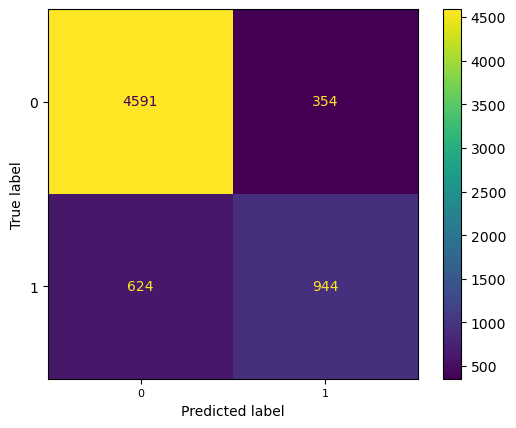

In [90]:
#Standardization of data and KNN model 
logreg_scaler = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('logreg', LogisticRegression())
                ])
ConfusionMatrix(classifier=logreg_scaler, confusionMatrix=False)

In [91]:
predictions, indices, true = CVmodel(model=logreg_scaler, pipeline = True)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
feature_importance = model.coef_[0]
# feature_importance = logreg_scaler.steps[1][1].coef_[0]
logistic_regression = {
    "name":"Logistic Regression",
    "predictions": predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true":true
}

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# open the file for binary writing using "with"
with open("modelresult/logistic_regression.p", "wb") as fp:
    pickle.dump(logistic_regression, fp)

In [93]:
#Standardization of data and KNN model 
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())
                ])

param = {'knn__n_neighbors': [10, 100],
         'knn__weights': ['uniform', 'distance'],
         'knn__p': [1, 2]}

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'knn__n_neighbors': 100, 'knn__p': 1, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6159
           1       0.71      0.55      0.62      1982

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [95]:
#Standardization of data and KNN model 
pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier())
                ])

param = {'knn__n_neighbors': [10, 50],
         'knn__weights': ['uniform'],
         'knn__p': [1]}

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6159
           1       0.72      0.55      0.62      1982

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: Fu

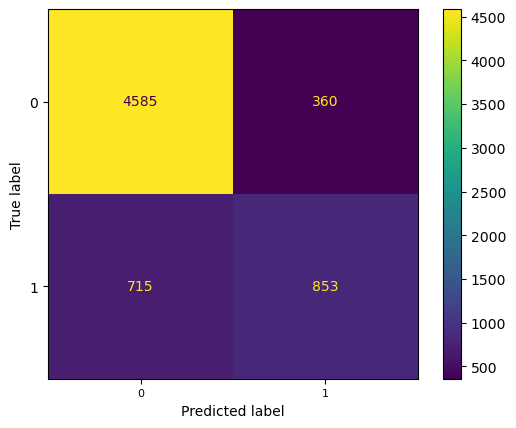

In [96]:
#Standardization of data and KNN model 
knn_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=50, p=1, weights='uniform'))
                ])

ConfusionMatrix(classifier=knn_standarization, confusionMatrix=False)

In [97]:
knn_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=50, p=1, weights='uniform'))
                ])

predictions, indices, true = CVmodel(model=knn_standarization, pipeline=True)
knn = {
    "name":"K-Nearest Neighbours",
    "predictions": predictions,
    "indices": indices,
    "true":true
}
# open the file for binary writing using "with"
with open("modelresult/k-nearest_neighbours.p", "wb") as fp:
    pickle.dump(knn, fp)

In [98]:
# split into a training and testing set
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()), 
                ('svc', SVC())
                ])

param = {'svc__C': [1, 10],
         'svc__kernel': ['linear', 'poly']}

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'svc__C': 1, 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6159
           1       0.73      0.60      0.66      1982

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [99]:
# split into a training and testing set
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()), 
                ('svc', SVC())
                ])

param = {'svc__kernel': ['linear', 'rbf'],
         'svc__gamma': ['scale', 'auto']
        }

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'svc__gamma': 'scale', 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6159
           1       0.73      0.60      0.66      1982

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


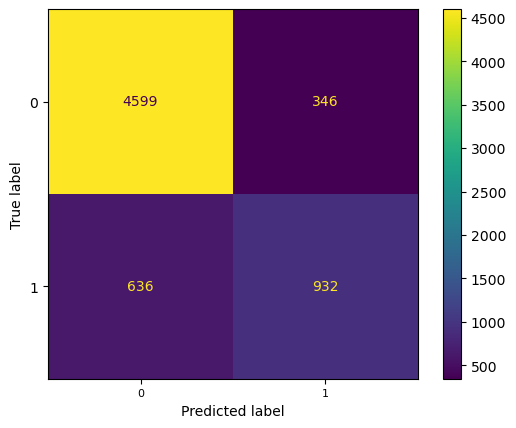

In [100]:
#Standardization of data and KNN model 
svm_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('svm',  SVC(kernel='linear', C=1, gamma='scale', probability=True))
                ])

ConfusionMatrix(classifier=svm_standarization, confusionMatrix=False)

In [107]:
with open("modelresult/decision_tree.p", "rb") as fp:
    tree = pickle.load(fp)
    
with open("modelresult/random_forest.p", "rb") as fp:
    rand_forest = pickle.load(fp)
    
with open("modelresult/linear_regression.p", "rb") as fp:
    lin_reg = pickle.load(fp)
    
with open("modelresult/logistic_regression.p", "rb") as fp:
    log_reg = pickle.load(fp)
    
with open("modelresult//k-nearest_neighbours.p", "rb") as fp:
    knn = pickle.load(fp)

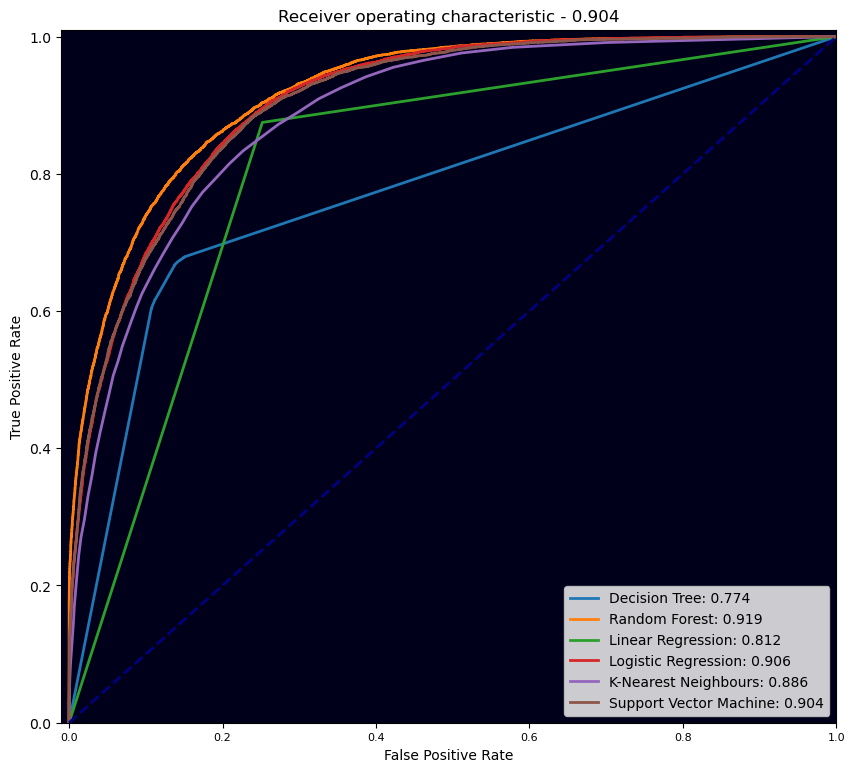

In [109]:
listOfResults = []
true = (df[target]==1)
for result in [tree, rand_forest, lin_reg, log_reg, knn, svm]:
    pred = pd.Series(sum(result["predictions"], []), 
                     index=sum(result["indices"], [])).sort_index()
    listOfResults.append((true, pred, result["name"]))
plotROCs(listOfResults, saving = True)

In [111]:
model = RandomForestClassifier(random_state=2020, n_jobs=-1, n_estimators=100, 
                                 max_depth=50, max_features=10, min_samples_split=30)
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
output = pd.DataFrame({'index': X_test.index, 'income >$50K/yr': predictions})
output.to_csv('prediction/income_prediction.csv', index=False)
print("END OF THE PREDICTING")

END OF THE PREDICTING


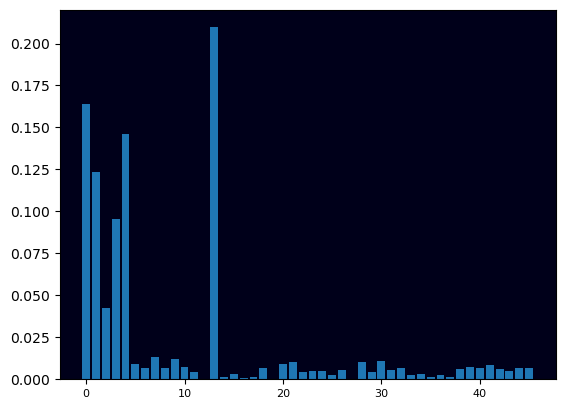

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
plt.bar([x for x in range(len(tree["feature importance"]))], tree["feature importance"])
plt.show()

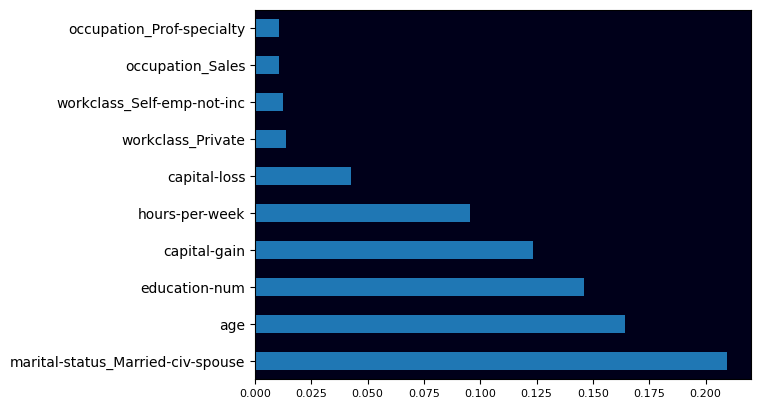

In [113]:
#plot graph of feature importances for better visualization
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_dt = pd.Series(tree["feature importance"], index=features)
feat_importances_dt.nlargest(10).plot(kind='barh')
plt.show()

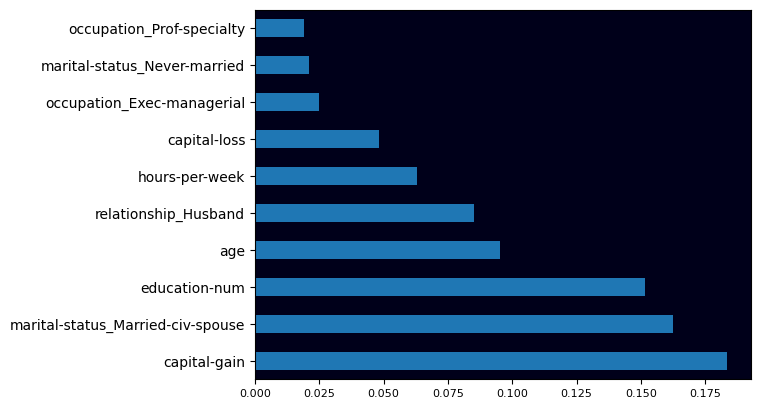

In [114]:
#plot graph of feature importances for better visualization
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_rf = pd.Series(rand_forest["feature importance"], index=features)
feat_importances_rf.nlargest(10).plot(kind='barh')
plt.show()

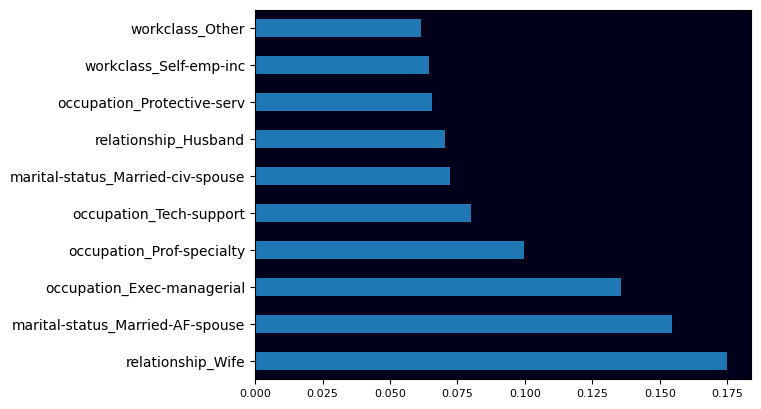

In [115]:
#plot graph of feature importances for better visualization
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_linr = pd.Series(lin_reg["feature importance"], index=features)
feat_importances_linr.nlargest(10).plot(kind='barh')
plt.show()

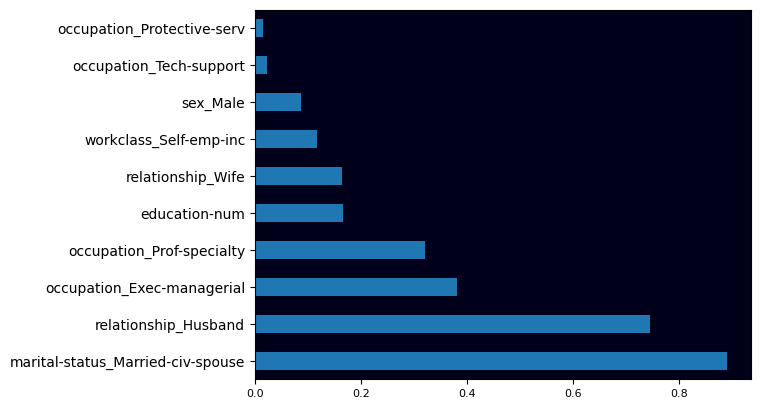

In [116]:
#plot graph of feature importances for better visualization
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_logr = pd.Series(log_reg["feature importance"], index=features)
feat_importances_logr.nlargest(10).plot(kind='barh')
plt.show()

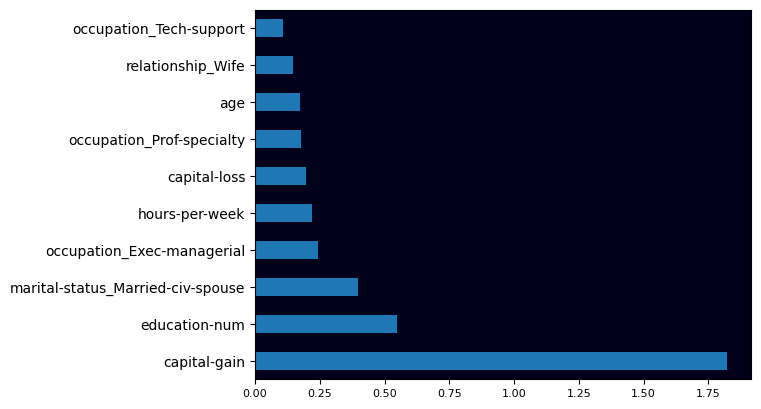

In [117]:
#plot graph of feature importances for better visualization
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_svm = pd.Series(svm["feature importance"], index=features)
feat_importances_svm.nlargest(10).plot(kind='barh')
plt.show()

In [118]:
def feature_importance_average(list_f, features=features):
    '''Function return dictionary of features and average feature importance.
    Avegare feature importance is counting using list of models' feature importance.'''
    j = 0
    dict_features = {}
    for feature in features:
        dict_features[feature] = 0

    for feature_importance_list in list_f:
        for i in range(len(feature_importance_list)):
            f = features[i]
            if(j == 0 ):
                average = feature_importance_list[i]
            else:
                average = (feature_importance_list[i] + dict_features[f]) / j
            dict_features[f] = average
            i += 1
        j += 1
    return dict_features

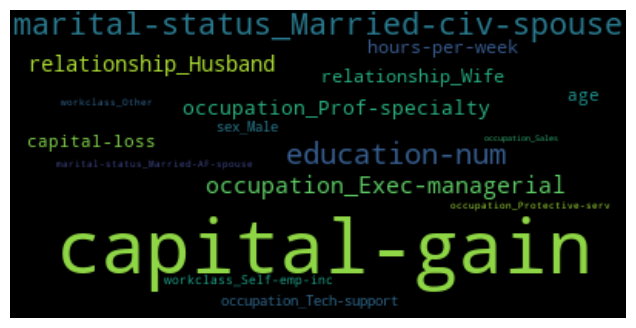

In [119]:
list_f = [feat_importances_dt, feat_importances_rf, feat_importances_linr, feat_importances_logr, feat_importances_svm ]
dict_features = feature_importance_average(list_f)
def draw_wordcloud(dict_features, save = False):
    '''Function draw, and save if needed wordcloud for dictionary- words and weights'''
    
    fig = plt.figure(figsize=(12,4))
    #create object
    wordcloud = WordCloud(background_color='black',max_font_size = 50)
    wordcloud.generate_from_frequencies(dict_features)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if(save):
        plt.savefig('images/wordcloud.png', transparent = True)
    plt.show()
draw_wordcloud(dict_features, save= True)